In [4]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow


In [273]:
img = cv2.imread('/content/10Good (11).png', cv2.IMREAD_GRAYSCALE)  # Read input image as gray-scale

# ret, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)  # Apply threshold using Otsu's thresholding (just in case image is not a binary image).

# cv2_imshow(img)


In [274]:
height =393
width =256
black_img = np.zeros((height,width,3), np.uint8)

# cv2_imshow(img)

1
87.0348892211914


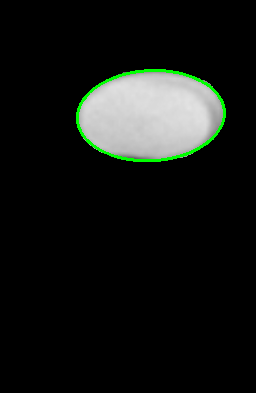

In [275]:
# Find contours in img.
cnts = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)[-2]  # [-2] indexing takes return value before last (due to OpenCV compatibility issues).

print(len(cnts))
# Find the contour with the maximum area.
c = max(cnts, key=cv2.contourArea)

# Find the minimum area bounding rectangle
# https://stackoverflow.com/questions/18207181/opencv-python-draw-minarearect-rotatedrect-not-implemented
ellipse = cv2.fitEllipse(c)

print(ellipse[2])

# Convert image to BGR (just for drawing a green rectangle on it).
bgr_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

cv2.ellipse(bgr_img,ellipse,(0,255,0),2)

# cv2.drawContours(bgr_img, [box], 0, (0, 255, 0), 2)

# Show images for debugging
cv2_imshow(bgr_img)

In [276]:
(h, w) =bgr_img.shape[:2]
(cX, cY) = (w // 2, h // 2)
# rotate our image by 45 degrees around the center of the image
M = cv2.getRotationMatrix2D((cX, cY),ellipse[2], 1.0)
rotated = cv2.warpAffine(bgr_img, M, (w, h))
# cv2_imshow(rotated)
# rotate our image by -90 degrees around the image
# M = cv2.getRotationMatrix2D((cX, cY), -90, 1.0)
# rotated = cv2.warpAffine(image, M, (w, h))
# cv2.imshow("Rotated by -90 Degrees", rotated)

In [277]:
rotate_gray=cv2.cvtColor(rotated,cv2.COLOR_BGR2GRAY)

((48.27210235595703, 169.33010864257812), (93.92263793945312, 150.94895935058594), 3.012787342071533)
[[ -2.5911598 242.23204  ]
 [  5.3425407  91.491714 ]
 [ 99.13536    96.42818  ]
 [ 91.20166   247.1685   ]]
[[ -2 242]
 [  5  91]
 [ 99  96]
 [ 91 247]]


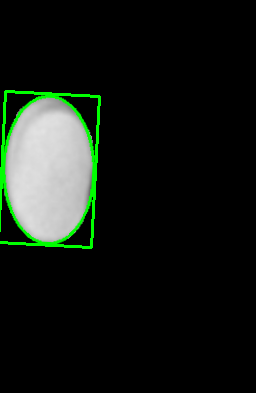

In [278]:
# Find contours in img.
cnts = cv2.findContours(rotate_gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)[-2]  # [-2] indexing takes return value before last (due to OpenCV compatibility issues).

# Find the contour with the maximum area.
c = max(cnts, key=cv2.contourArea)

# Find the minimum area bounding rectangle
# https://stackoverflow.com/questions/18207181/opencv-python-draw-minarearect-rotatedrect-not-implemented
rect = cv2.minAreaRect(c)

print(rect)

box = cv2.boxPoints(rect)

print(box)

box = np.int0(box)

print(box)
# Convert image to BGR (just for drawing a green rectangle on it).
bgr_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

cv2.drawContours(rotated, [box], 0, (0, 255, 0), 2)

# Show images for debugging
cv2_imshow(rotated)


In [279]:
x=(box[0][0]+box[1][0])/2
y=(box[1][1]+box[2][1])/2

In [280]:
# wid=int(rect[1][0])
# hei=int(rect[1][1])


In [281]:
x,y

(1.5, 93.5)

In [282]:
box

array([[ -2, 242],
       [  5,  91],
       [ 99,  96],
       [ 91, 247]])

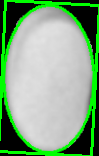

In [285]:
cropped_img=rotated[box[1][1]:box[3][1],0:box[2][0]]

cv2_imshow(cropped_img)

In [283]:
cropped_img=rotated[box[1][1]:box[2][1],box[0][0]:box[1][0]]

cv2_imshow(cropped_img)

error: ignored

In [265]:
# wid=int(rect[1][0])
# hei=int(rect[1][1])


In [266]:
centre_crop=(cropped_img.shape[1]/2,cropped_img.shape[0]/2)

In [267]:
centre_black=(black_img.shape[1]/ 2,black_img.shape[0]/ 2)

In [268]:
centre_black

(128.0, 196.5)

In [269]:
centre_crop

(47.0, 75.0)

In [270]:
# shifted=(int(centre_crop[0]-centre_black[0]),int(centre_crop[1]-centre_black[1]))

In [271]:
i=int(centre_black[0]-centre_crop[0])
j=int(centre_black[1]-centre_crop[1])

i,j

(81, 121)

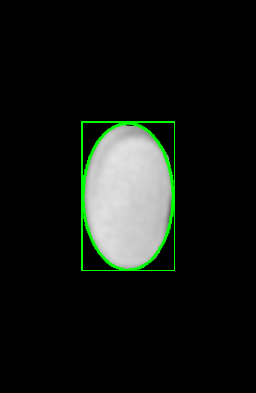

In [272]:
black_img[j:j+cropped_img.shape[0],i:i+cropped_img.shape[1]]=cropped_img

cv2_imshow(black_img)

In [190]:
black_img[int(box[1][1]-shifted[1]):int(box[1][1]+hei),int(box[0][0]-shifted[0]):int(box[0][0]+wid)]=cropped_img

ValueError: ignored

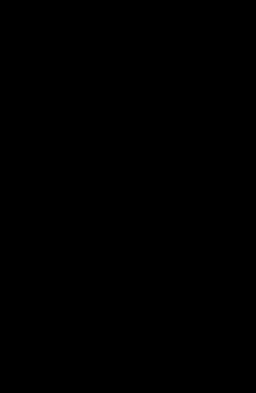

In [156]:
cv2_imshow(black_img)

1